# SUPERFÍCIES QUÁDRICAS


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
## Funções que definem os tipos de coordenadas dos plots

# Coordenadas Cilindricas
def cil(r1,r2):
    t = np.linspace(0, 2*np.pi, 100)
    r = np.linspace(r1,r2, 100)
    t, r = np.meshgrid(t, r)
    x = np.cos(t)
    y = np.sin(t)
    return x,y,r

# Coordenadas Hiperbólicas
def hiper():
    rho = 1
    u = np.linspace(-1, 1, 100)
    t = np.linspace(0, 2*np.pi, 100)

    u, t = np.meshgrid(u,t)

    x = rho*(np.cosh(u) * np.cos(t))
    y = rho*(np.cosh(u) * np.sin(t))
    z = rho*(np.sinh(u))
    return x,y,z

# Coordenadas Esféricas
def esf():
    theta = np.linspace(0,2*np.pi,100)
    phi = np.linspace(0,np.pi,100)

    theta, phi = np.meshgrid(theta,phi)

    x = np.sin(phi)*np.cos(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(phi)
    return x,y,z

## Equações

- Cilíndro:
$(x/a) ^2 + (y/b) ^2 = 1$  

- Elipsóide:
$(x/a) ^2 + (y/b)^2 + (z/c)^2 = 1$  

- Cone:
$(x/a) ^2 + (y/b)^2 = (z/c)^2$  
  
- Parabolóide Eliptico:
$(x/a) ^2 + (y/b)^2 = z/c$  
  
- Hiperboloide de Uma Folha:
$(x/a) ^2 + (y/b)^2 - (z/c)^2 = 1$  
  
- Parabolóide Hiperbólico:
$(x/a) ^2 - (y/b)^2 = z/c$  
  
- Hiperbolóide de Duas Folhas:
$-(x/a) ^2 - (y/b)^2 + (z/c)^2 = 1$

In [3]:
superficies = [
                (f'Cilindro \n $x^2+y^2=1$',cil(-1,1)[0],cil(-1,1)[1],cil(-1,1)[2],'k'),
               
                (f'Hiperbolóide de Uma Folha \n $x^2+y^2-z^2=1$',hiper()[0],hiper()[1],hiper()[2],'k'),
               
                (f'Cone \n $x^2 + y^2 = z^2$',cil(-1,1)[0]*cil(-1,1)[2],cil(-1,1)[1]*cil(-1,1)[2],cil(-1,1)[2],'k'),

                (f'Hiperbolóide de Duas Folhas \n $-x^2-y^2+z^2=1$',cil(0,1)[0]*cil(0,1)[2],cil(0,1)[1]*cil(0,1)[2],1+(cil(0,1)[0]*cil(0,1)[2])**2+(cil(0,1)[1]*cil(0,1)[2])**2,'r'),
               
                (f'Parabolóide Eliptico  \n $x^2 + y^2 = z$',cil(0,1)[0]*cil(0,1)[2],cil(0,1)[1]*cil(0,1)[2],cil(0,1)[2]**2,'k'),
               
                (f'Parabolóide Hiperbólico \n $x^2 - y^2 = z$',esf()[0],esf()[1],esf()[0]**2-esf()[1]**2,'k'),
                             
                (f'Elipsóide \n $x^2+y^2+z^2=1$',esf()[0],esf()[1],esf()[2],'b')
]

In [4]:
# Visualiza as superfícies quádricas
def grafico(savefig = False,i_=0,j_=0,caminho='',dpi=300):
    fig = plt.figure(figsize=(12,12))
    for i,j in zip(superficies,range(len(superficies))):
        fig.subplots_adjust(wspace=-0.1, hspace=-0.2)
        ax = fig.add_subplot(3,3, j+1, projection='3d')
        plt.title(i[0],fontsize=12,y=0.9,fontweight='bold')
        if i[4] == 'r':
            ax.plot_surface(i[1], i[2], i[3],alpha=0.8,cmap='plasma_r')
            ax.plot_surface(i[1], i[2], -i[3],alpha=0.8,cmap='plasma')
        else:
            ax.plot_surface(i[1], i[2], i[3],alpha=0.8,cmap='plasma_r')
        ax.quiver(0,0,0,1.1,0,0, arrow_length_ratio=0.2, color='k')
        ax.quiver(0,0,0,0,1.1,0, arrow_length_ratio=0.2, color='k')
        ax.quiver(0,0,0,0,0,1.1, arrow_length_ratio=0.2, color='k')
        ax.text(1.2,0,0, "x", size=9, zorder=1)
        ax.text(0,1.2,0, "y", size=9, zorder=1)
        ax.text(0,0,1.2, "z", size=9, zorder=1)
        ax.axis('off')
        if savefig == True:
            ax.view_init(elev=j_, azim=i_)
            plt.savefig(caminho+str(i_)+'.png',dpi=dpi)
        else:
            ax.view_init(elev=30, azim=40)
    return plt.plot(xs=0,ys=0)
    

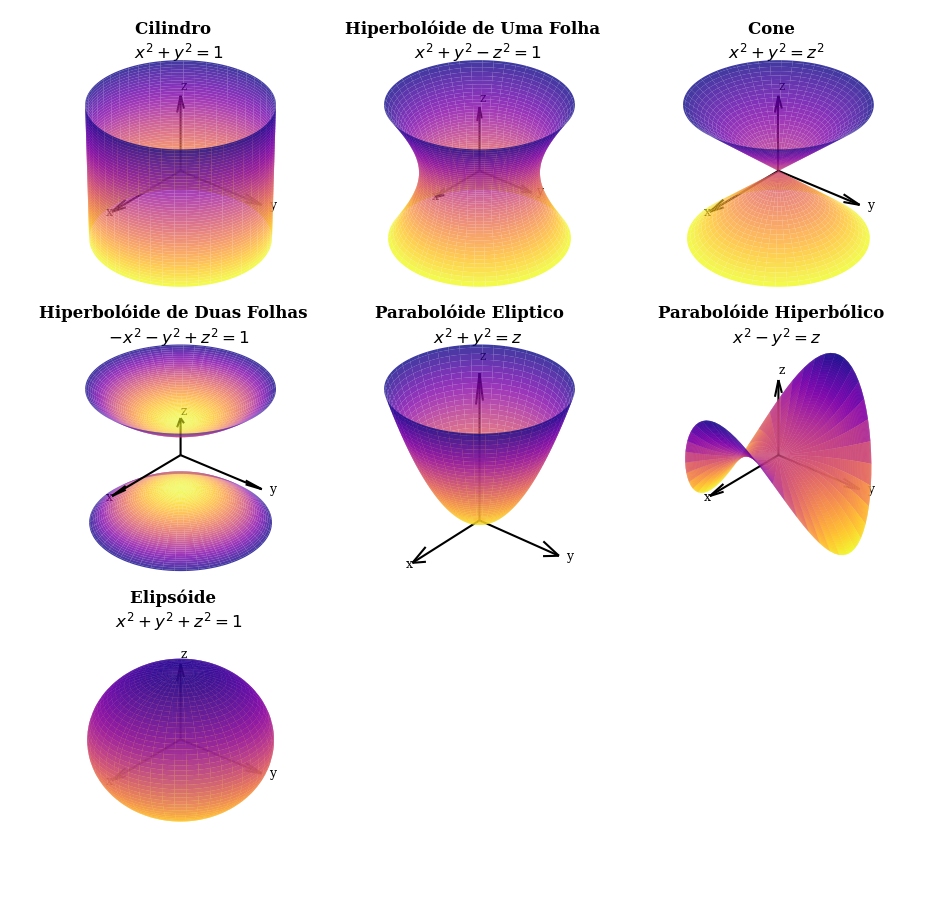

In [5]:
grafico()

In [6]:
# Salva os frames
caminho = '' # Onde as figuras serão salvas.
inter = [0,360,9] # Rotação das figuras de 0 a 360 graus, com intervalos de 9 em 9 (40 frames).
dpi = 100 # Qualidade da imagem, determina quantos pixels a figura compreende.

for i_,j_ in zip(np.arange(inter[0],inter[1],inter[2]),np.arange(inter[0],inter[1],inter[2])):
    grafico(savefig=True, i_=i_, j_=j_, caminho=caminho, dpi=dpi)
    plt.close()

# REFERÊNCIAS
- STEWART, James; ROMO, Jorge Humberto. cálculo. Cengage Learning, 2017.
- https://stackoverflow.com/questions/23378688/matplotlib-surface-plot-extends-past-axis-limits
- https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
